In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
# importing the BodyMearurements dataset
df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/BodyMeasurements.csv')
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             715 non-null    float64
 1   Age                716 non-null    int64  
 2   HeadCircumference  716 non-null    int64  
 3   ShoulderWidth      716 non-null    int64  
 4   ChestWidth         716 non-null    int64  
 5   Belly              716 non-null    int64  
 6   Waist              716 non-null    int64  
 7   Hips               716 non-null    int64  
 8   ArmLength          716 non-null    int64  
 9   ShoulderToWaist    716 non-null    int64  
 10  WaistToKnee        716 non-null    int64  
 11  LegLength          716 non-null    int64  
 12  TotalHeight        716 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 72.8 KB


Columns name translations:
- Gender -> Genere
- Age -> Età
- HeadCircumference -> CirconferenzaTesta
- ShoulderWidth -> LarghezzaSpalle
- ChestWidth -> LarghezzaTorace
- Belly -> Pancia
- Waist -> Vita
- Hips -> Fianchi
- ArmLength -> LunghezzaBraccio
- ShoulderToWaist -> SpallaAVita
- WaistToKnee -> VitaAGinocchio
- LegLength -> LunghezzaGamba
- TotalHeight -> AltezzaTotale

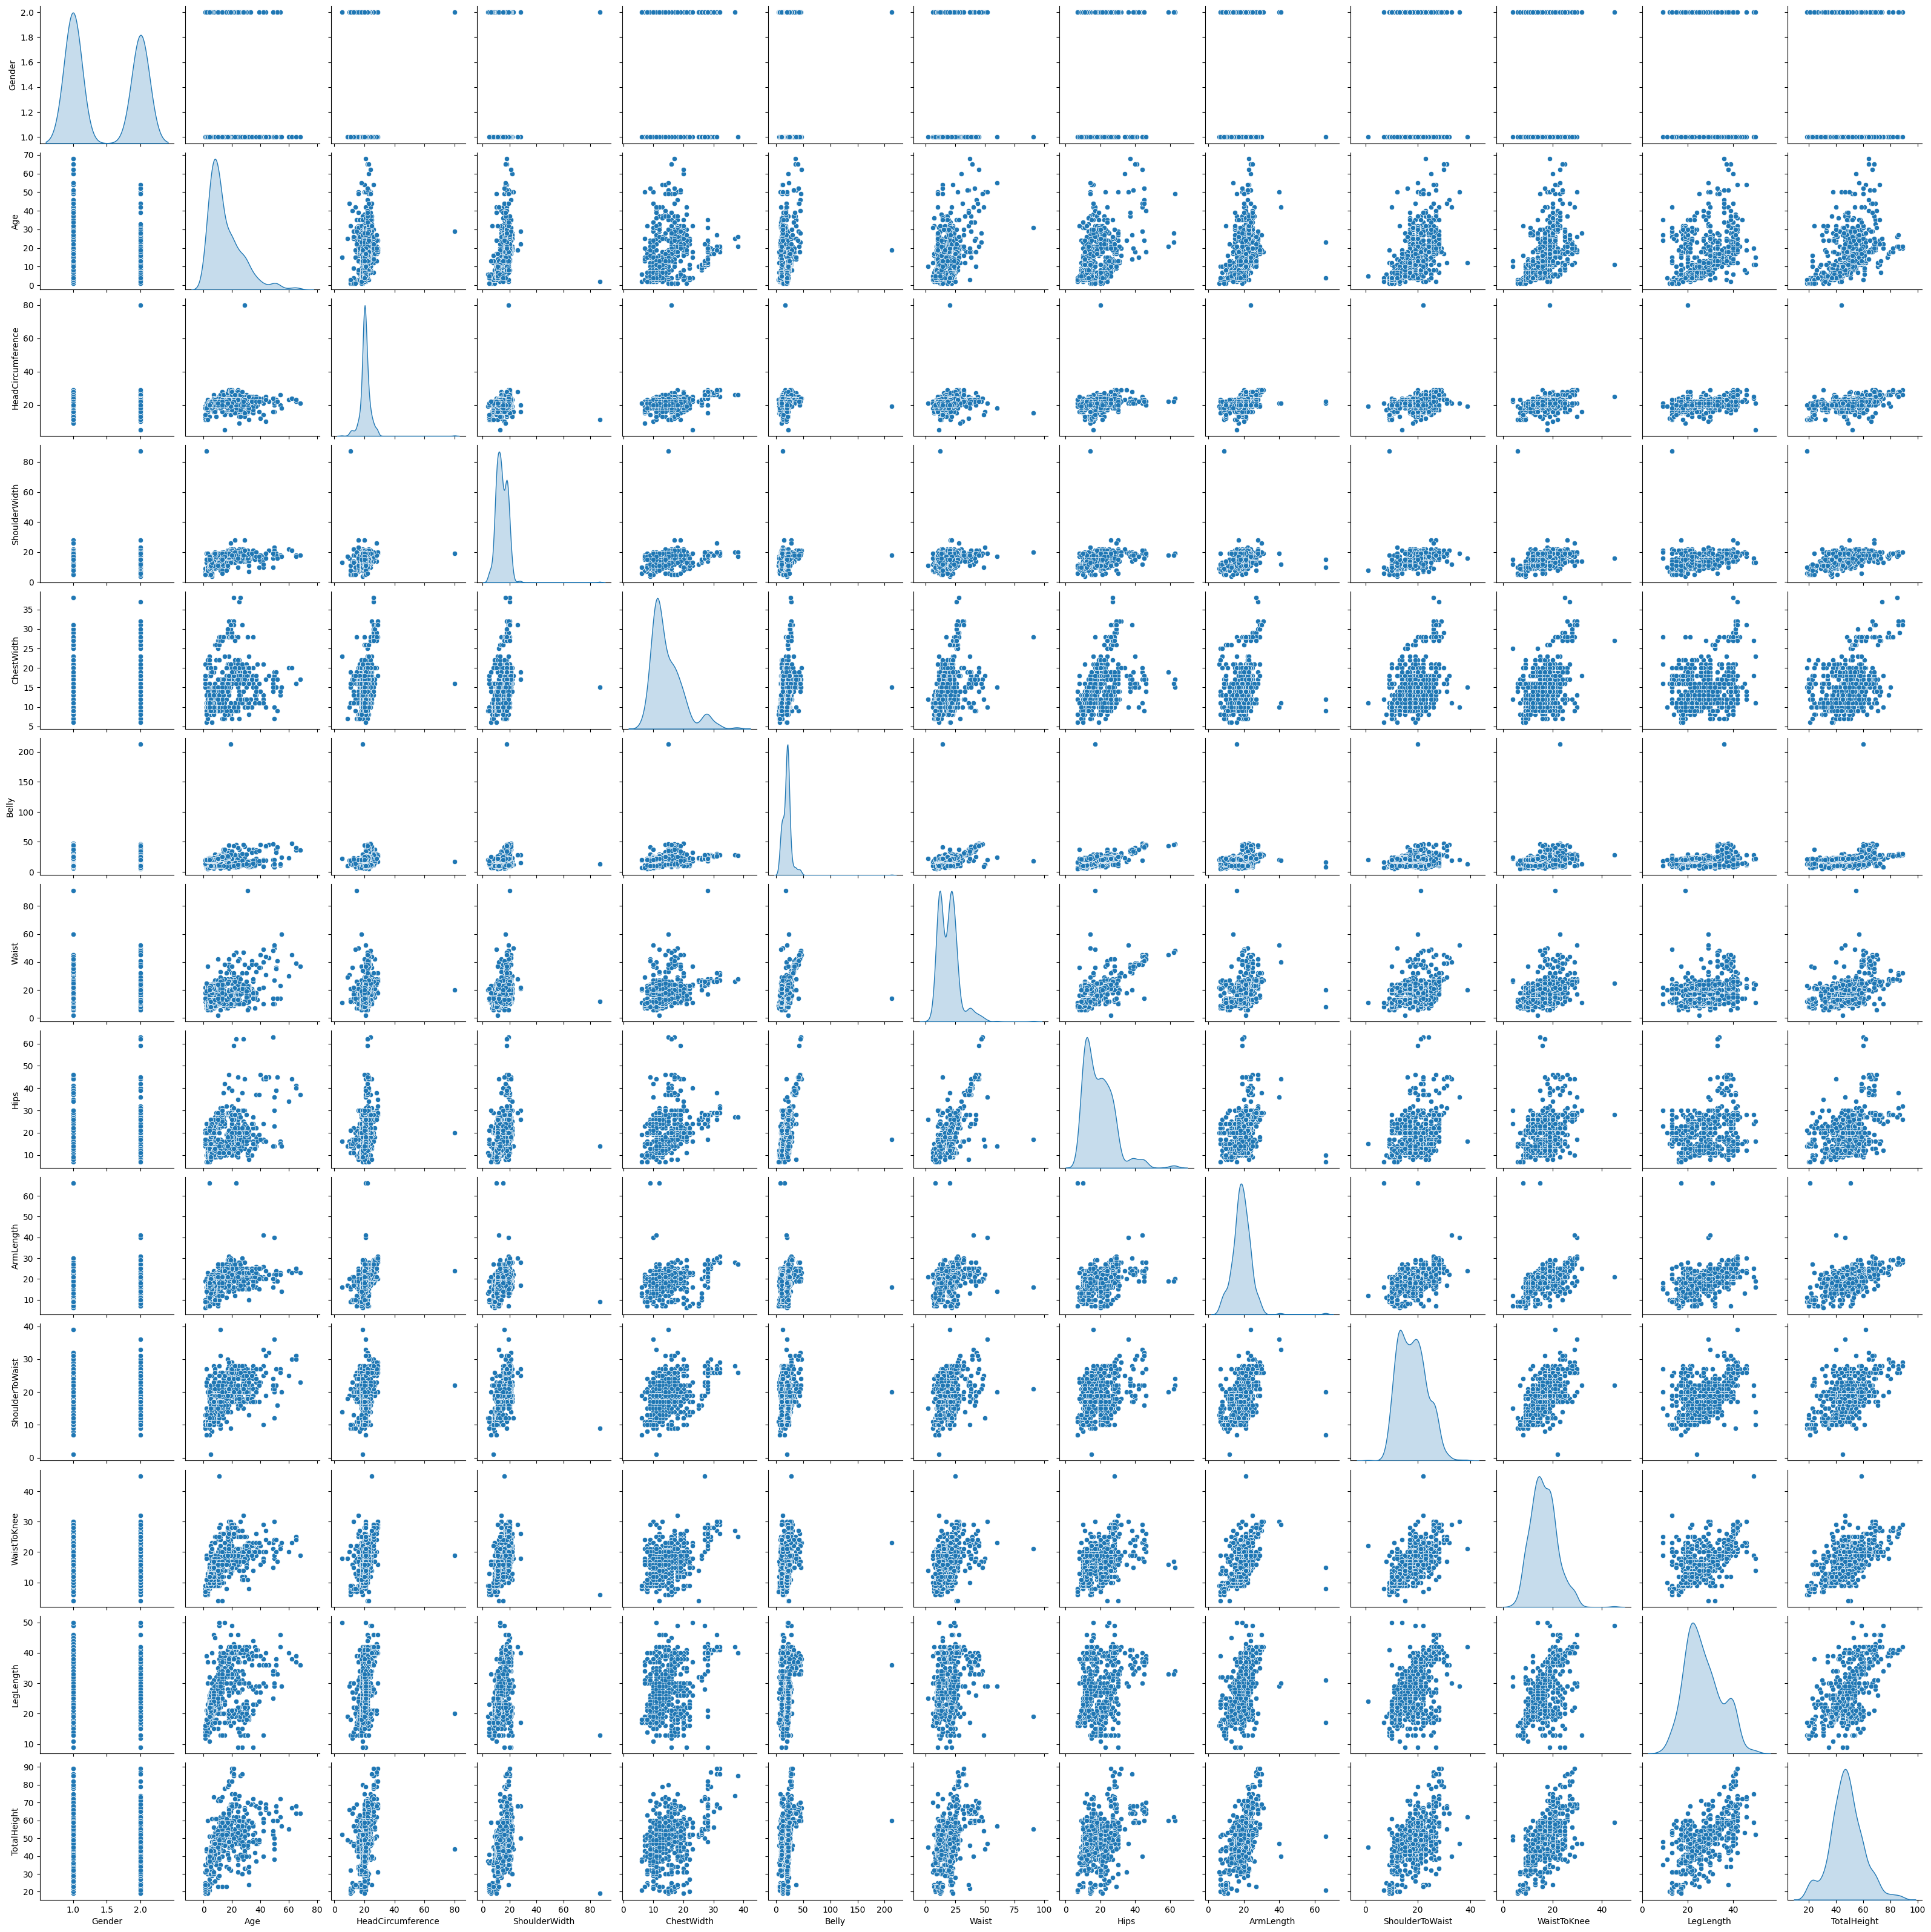

In [3]:
# Seaborn pairplot
sns.pairplot(df, kind='scatter', diag_kind='kde')

## Cleaning outlier data

In [21]:
# Select the columns "HeadCircumference"
HC_data = df['HeadCircumference']
# Calculate the mean and standard deviation of the data
mean = HC_data.mean()
std = HC_data.std()
# Define the threshold for identifying outliers (number of standard deviations from the mean)
threshold = 3
# Compute the thresholds for outlier detection
computed_threshold = threshold * std
# Identify outliers based on the standard deviation method
standard_deviation_HC_outliers = np.abs(HC_data - mean) > computed_threshold
# Count the number of outliers
num_outliers = standard_deviation_HC_outliers.sum()
# Print the results
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")
print(f"Threshold: {threshold}")
print(f"Computed Threshold: {computed_threshold}")
print(f"Number of Outliers: {num_outliers}")

Mean: 20.574022346368714
Standard Deviation: 3.743353422674967
Threshold: 3
Computed Threshold: 11.2300602680249
Number of Outliers: 3


In [5]:
df = df[~standard_deviation_HC_outliers]

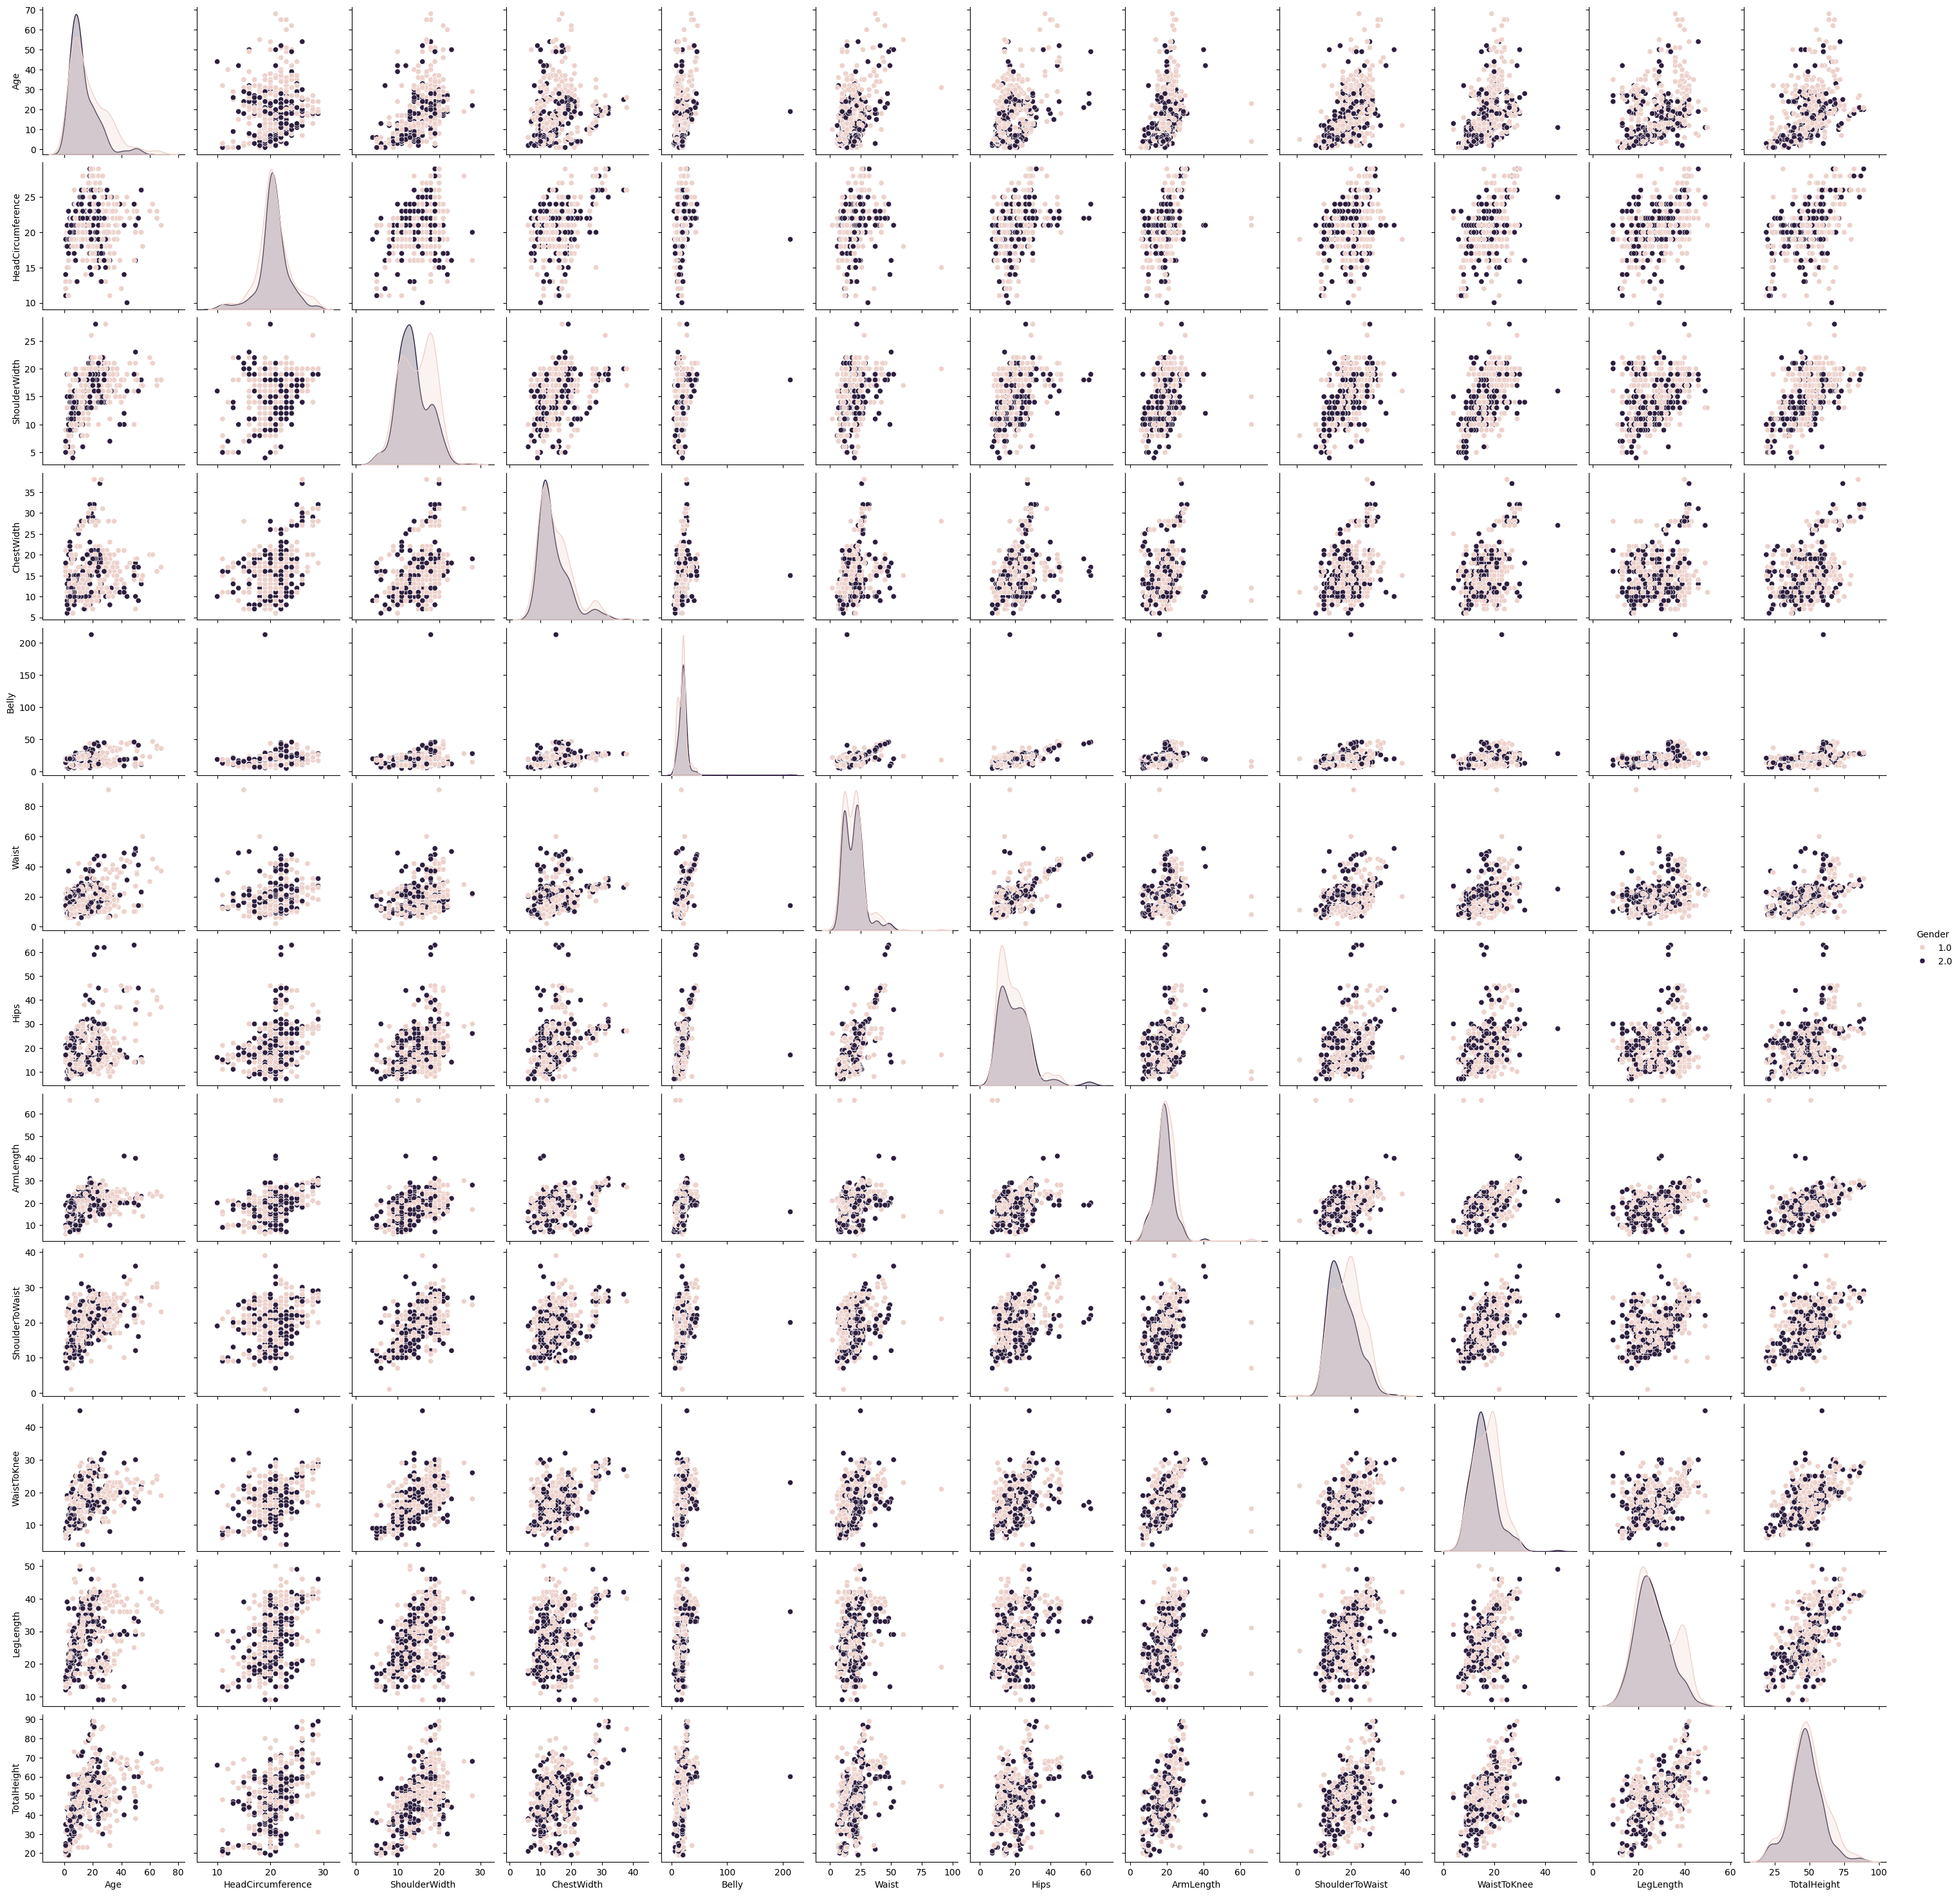

In [17]:
# Seaborn pairplot after removing outliers
sns.pairplot(df, hue='Gender')

In [ ]:
# Select the columns "ShoulderWidth"
SW_data = df['ShoulderWidth']
# Calculate the mean and standard deviation of the data
mean = SW_data.mean()
std = SW_data.std()
# Define the threshold for identifying outliers (number of standard deviations from the mean)
threshold = 3
# Compute the thresholds for outlier detection
computed_threshold = threshold * std
# Identify outliers based on the standard deviation method
standard_deviation_SW_outliers = np.abs(SW_data - mean) > computed_threshold #all the true and false values
# Count the number of outliers
num_outliers = standard_deviation_SW_outliers.sum()
# Print the results
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")
print(f"Threshold: {threshold}")
print(f"Computed Threshold: {computed_threshold}")
cprint(f"Number of Outliers: {num_outliers}\n")

Mean: 14.308555399719495
Standard Deviation: 4.767651680338077
Threshold: 3
Computed Threshold: 14.302955041014233
Number of Outliers: 1


In [16]:
df = df[~standard_deviation_SW_outliers]

In [22]:
column_names = ['Belly', 'ArmLength', "ShoulderWidth", "HeadCircumference", "WaistToKnee", "Waist"]

for column_name in column_names:
    # Select the columns "column_name"
    CN_data = df[column_name]
    # Calculate the mean and standard deviation of the data
    mean = CN_data.mean()
    std = CN_data.std()
    # Define the threshold for identifying outliers (number of standard deviations from the mean)
    threshold = 3 #Se un valore è lontano più di 3 std dalla media
    # Compute the thresholds for outlier detection
    computed_threshold = threshold * std
    # Identify outliers based on the standard deviation method
    standard_deviation_CN_outliers = np.abs(CN_data - mean) > computed_threshold #Tutti True e False
    # Count the number of outliers
    num_outliers = standard_deviation_CN_outliers.sum()
    # Print the results
    print(f"Column: {column_name}")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std}")
    print(f"Threshold: {threshold}")
    print(f"Computed Threshold: {computed_threshold}")
    print(f"Number of Outliers: {num_outliers}\n")

    df = df[~standard_deviation_CN_outliers]

Column: Belly
Mean: 20.199720670391063
Standard Deviation: 10.132992568012883
Threshold: 3
Computed Threshold: 30.39897770403865
Number of Outliers: 1

Column: ArmLength
Mean: 18.82097902097902
Standard Deviation: 5.379320986729714
Threshold: 3
Computed Threshold: 16.137962960189142
Number of Outliers: 4

Column: ShoulderWidth
Mean: 14.313642756680732
Standard Deviation: 4.770073620546846
Threshold: 3
Computed Threshold: 14.310220861640538
Number of Outliers: 1

Column: HeadCircumference
Mean: 20.585915492957746
Standard Deviation: 3.7409522548169845
Threshold: 3
Computed Threshold: 11.222856764450952
Number of Outliers: 3

Column: WaistToKnee
Mean: 16.536067892503535
Standard Deviation: 5.159197934449582
Threshold: 3
Computed Threshold: 15.477593803348746
Number of Outliers: 1

Column: Waist
Mean: 19.211048158640228
Standard Deviation: 8.678133752404824
Threshold: 3
Computed Threshold: 26.03440125721447
Number of Outliers: 8



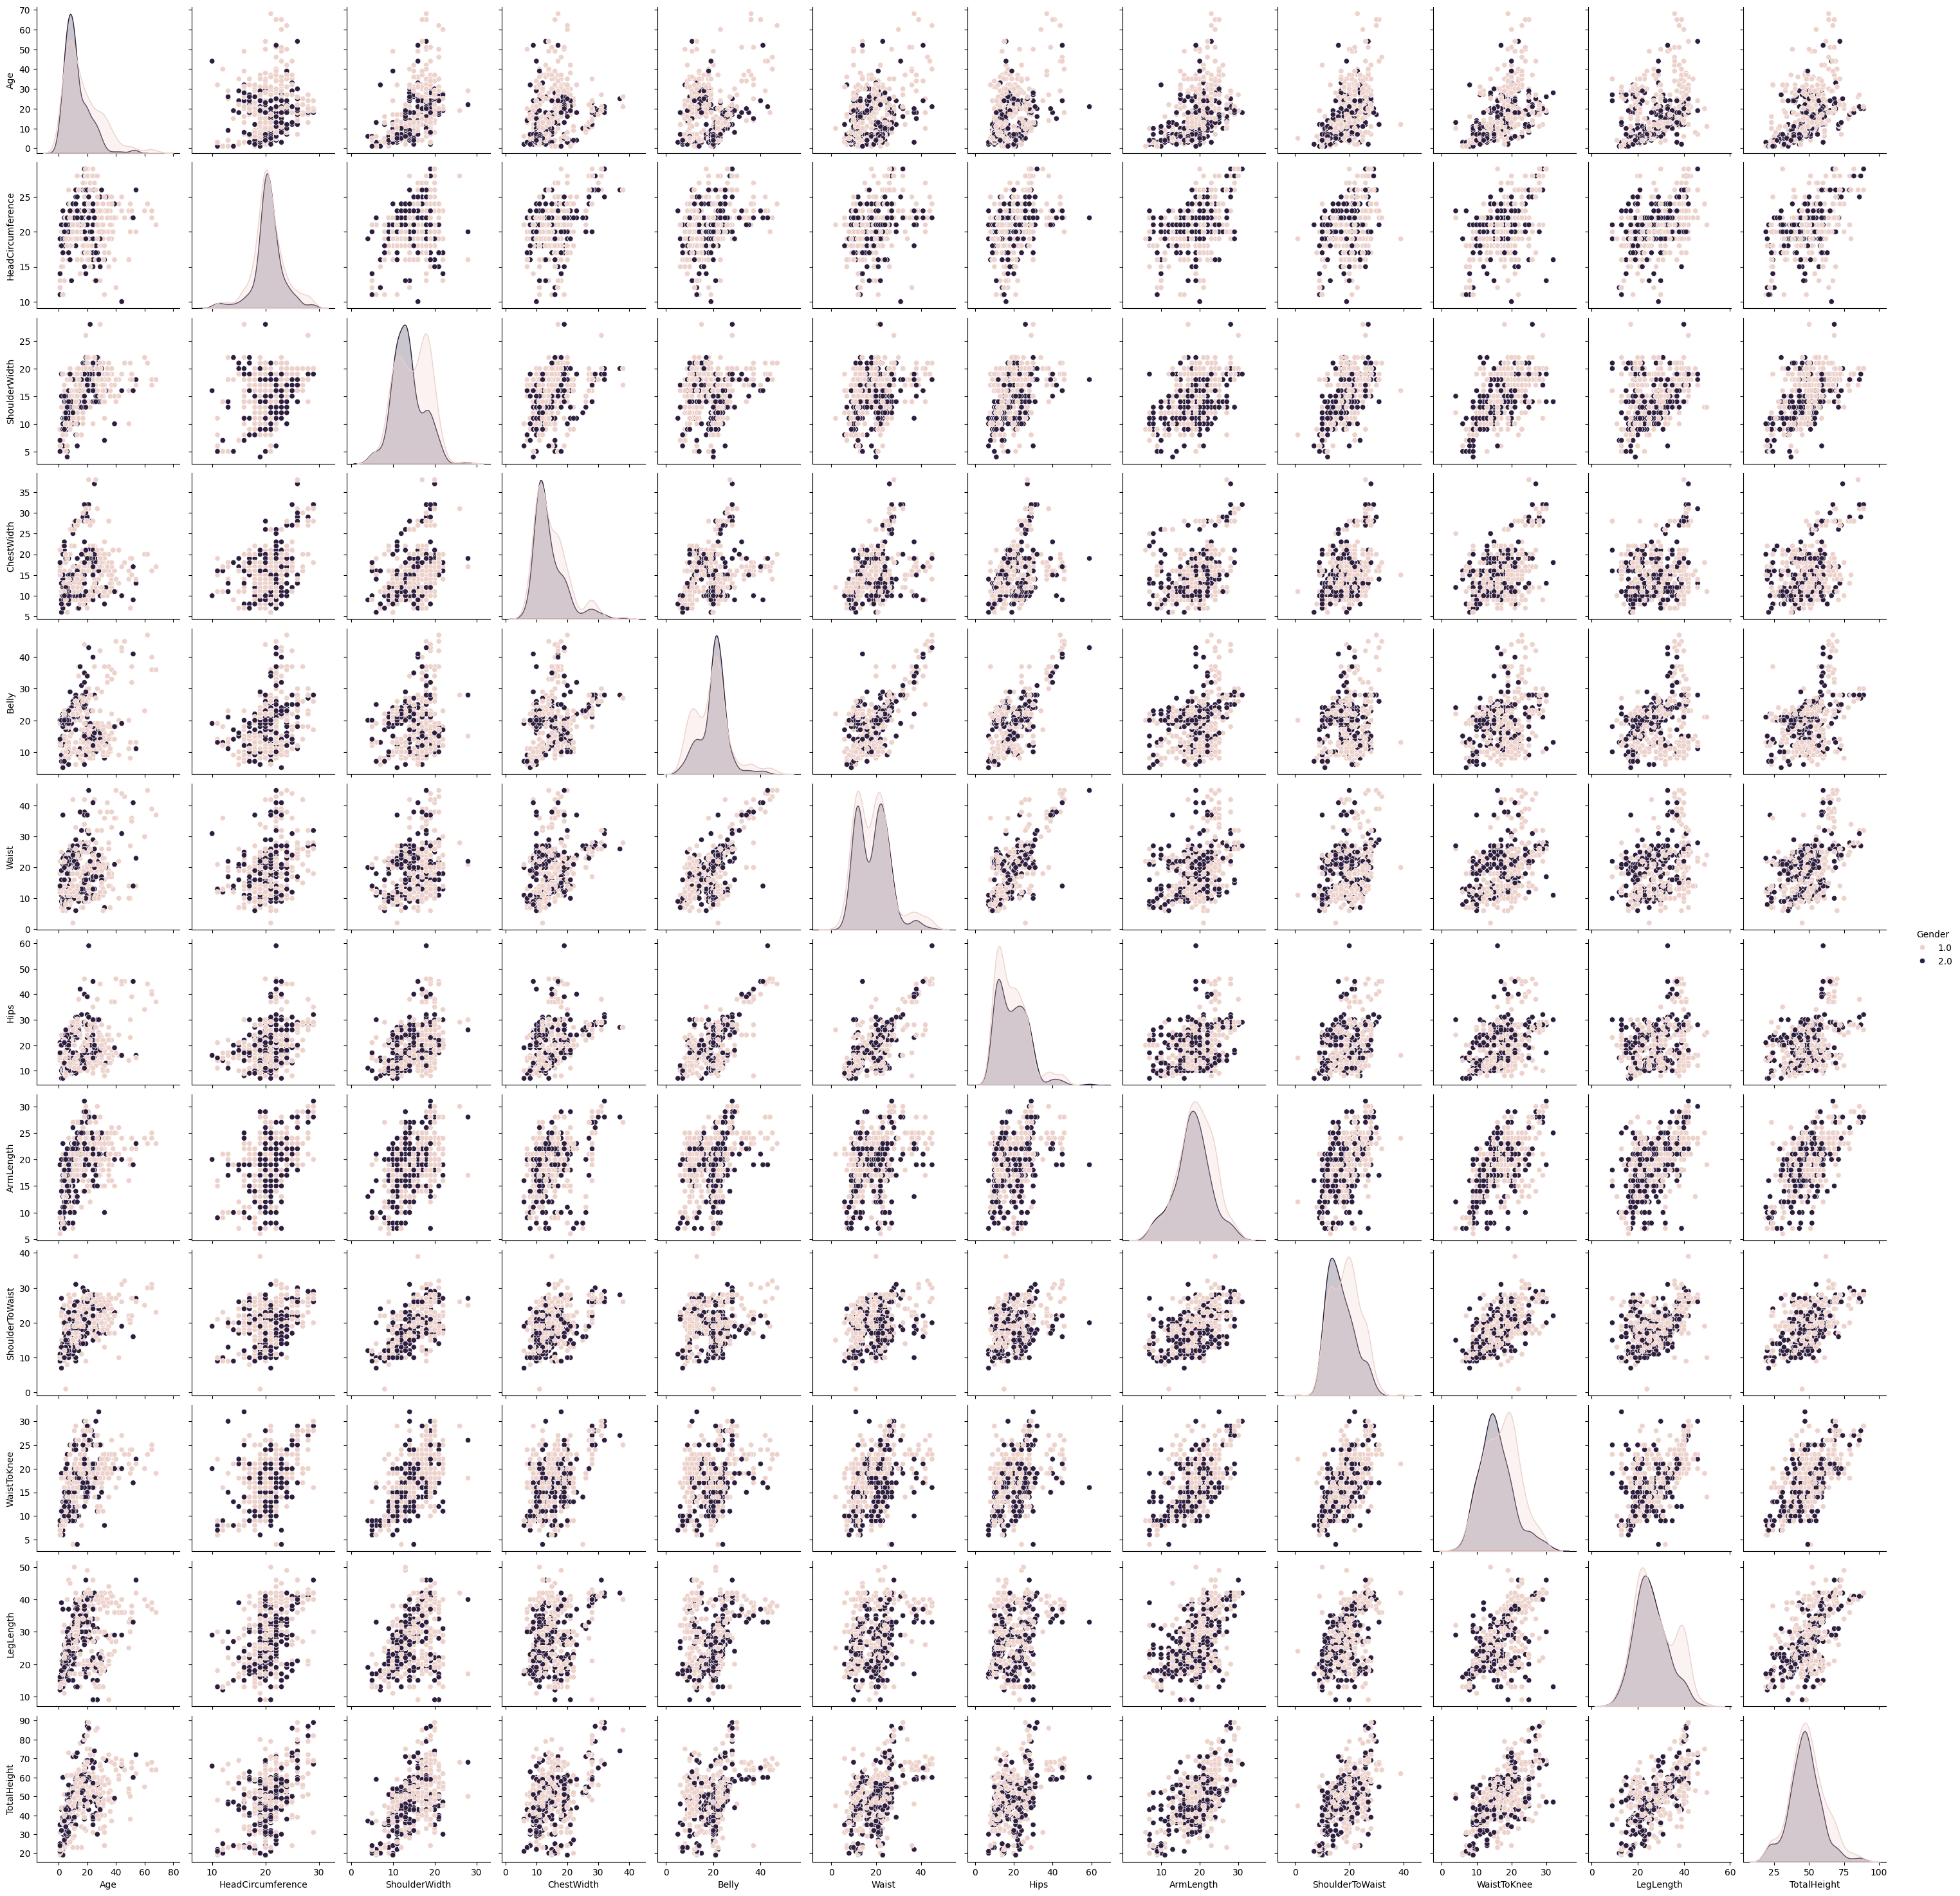

In [23]:
# New Pairplot
sns.pairplot(df, hue='Gender')

## Mantain soime columns

In [25]:
df = df[['Belly', 'ArmLength', "ShoulderWidth","ChestWidth", "ShoulderToWaist", "HeadCircumference", "WaistToKnee", "Waist", "TotalHeight"]]

In [26]:
# Standardize the data ----> Very impo for PCA!
scaler = StandardScaler()

In [28]:
cols = df.columns

# Standardize the data
df_standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns=cols )
df_standardized.head()

Belly  ArmLength  ShoulderWidth  ChestWidth  ShoulderToWaist  \
0 -0.268436   0.724511       0.985628    1.029307         1.348255   
1 -0.268436   2.016232       2.011298    0.463593         0.971822   
2 -0.850326   0.509224       0.985628    0.275022         0.030740   
3 -1.286743   1.155085       1.498463    0.652165         0.595389   
4 -0.995798   1.370372      -0.040042    0.652165         0.783606   

   HeadCircumference  WaistToKnee     Waist  TotalHeight  
0           0.501162     1.681976 -0.625480     0.323238  
1          -0.533782     1.681976  0.286515     0.652730  
2           0.156181    -0.489575 -1.146619     0.405611  
3          -0.188801     0.694907  0.025945    -0.253374  
4          -1.568727     3.063872 -1.016334    -0.088628

## PCA

In [ ]:
# Fit the PCA
pca = PCA(n_components=df_standardized.shape[1]) # Number of components = number of features
pca.fit(df_standardized)
# Transform the data
x_new_cols = df_standardized.columns
x_new = pca.fit_transform(df_standardized)
x_new = pd.DataFrame(x_new, columns=[f'PC{i+1}' for i in range(x_new.shape[1])]) # Create a DataFrame with the PCA components and the original column names
x_new.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.119634 -1.559717  0.161264  0.400132 -0.155355 -0.182089  0.248254   
1  2.704286 -1.508919 -0.893354 -0.969658 -0.798554  0.041623 -0.315156   
2  0.147498 -1.421974  0.610208 -0.096681 -0.316618  0.697463 -0.790316   
3  1.219183 -1.825318 -0.507294 -0.043836 -0.102363 -0.185933 -0.666199   
4  1.152339 -2.391256 -0.778330 -0.300974 -1.730916 -1.118485  1.616841   

        PC8       PC9  
0 -0.420860  0.783513  
1 -0.939887 -0.116581  
2  0.246911 -0.275693  
3 -0.831847 -0.583302  
4 -1.281346  0.744328

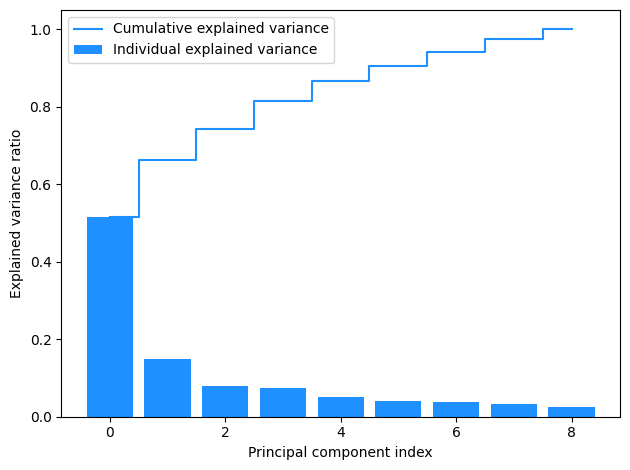

In [34]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Individual explained variance', color='dodgerblue')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', color='dodgerblue')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()